In [273]:

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score






In [274]:
email_dataset= pd.read_csv("email.csv")

email_dataset.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [297]:
email_dataset.isna().sum()

## there is no null values

Message    0
spam       0
dtype: int64

In [276]:
print(email_dataset["Category"].unique())


['ham' 'spam' '{"mode":"full"']


## To ensure the email_dataset includes only relevant categories and to exclude any rows with the value "mode":"full", we can filter the dataset to retain only those entries categorized as 'ham' or 'spam'.

In [277]:


email_dataset= email_dataset[(email_dataset["Category"]=="ham") | (email_dataset["Category"]=="spam")]

print(email_dataset["Category"].unique())

['ham' 'spam']


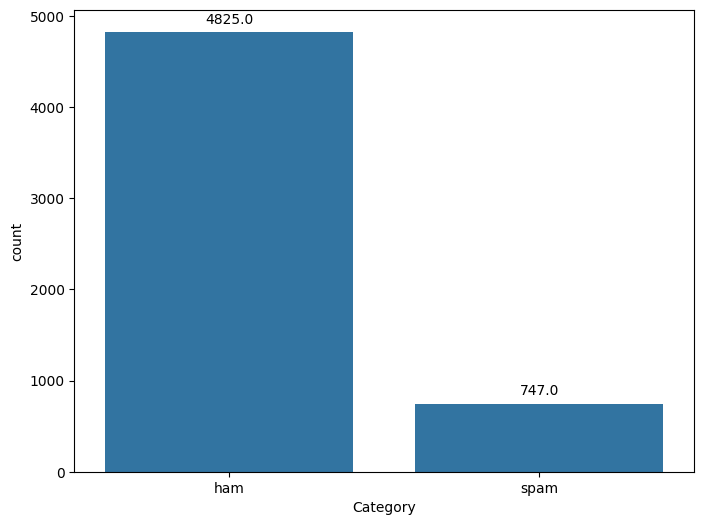

In [278]:
plt.figure(figsize=(8, 6))
countplot = sns.countplot(x='Category', data=email_dataset)

for p in countplot.patches:
    countplot.annotate(format(p.get_height()),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center',
                      xytext = (0, 9),
                      textcoords = 'offset points')

plt.show()

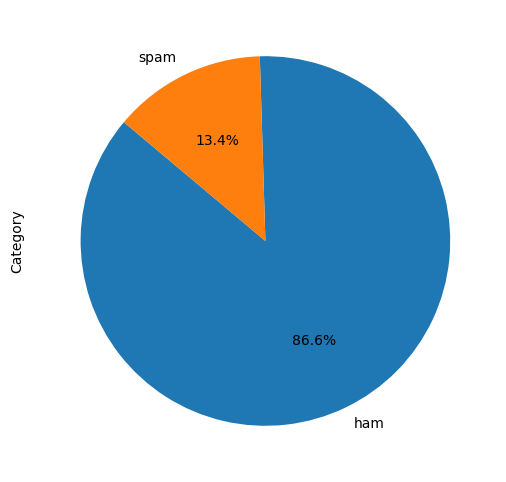

In [279]:
plt.figure(figsize=(8, 6))
email_dataset['Category'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.show()

In [280]:


print(email_dataset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 130.6+ KB
None


In [281]:
print(email_dataset.describe())



       Category                 Message
count      5572                    5572
unique        2                    5157
top         ham  Sorry, I'll call later
freq       4825                      30


## There is duplicates we should drop these duplicates

In [282]:


email_dataset = email_dataset.drop_duplicates(subset='Message', keep='first')

In [283]:
print(f"email_dataset shape: {email_dataset.shape}")



email_dataset shape: (5157, 2)


## ONE HOT ENCODING

### In our dataset, the 'category' column consists of two categorical values: 'spam' and 'ham'. Machine learning models require numerical input; hence, we will convert these categorical values into a numerical format using one-hot encoding. This will be achieved by employing the pd.get_dummies method from pandas, which transforms categorical data into a binary matrix representation. Since 'spam' and 'ham' are mutually exclusive categories, a single one-hot encoded column is sufficient to represent them, where one category can be inferred from the other. This process streamlines the categorical data, making it amenable to machine learning algorithms.

In [284]:
dummy=pd.get_dummies(email_dataset["Category"],drop_first=True)

email_dataset=pd.concat([email_dataset,dummy],axis=1)

email_dataset=email_dataset.drop("Category",axis=1)

email_dataset.head()

,Message,spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


## VECTORIZING STRING

## This code snippet is used for converting the text data in the 'Message' column of the email_dataset into numerical format that machine learning algorithms can process. The TfidfVectorizer from the sklearn library is being used for this purpose.



In [285]:
vectorizer = TfidfVectorizer()

# email_dataset["message"] sütununu vektöre dönüştür
X = vectorizer.fit_transform(email_dataset["Message"])




## TrainTestSPLİT


In [286]:

y=email_dataset["spam"].values

In [287]:
print(f"X.shape :{X.shape}")
print(f"y.shape :{y.shape}")

X.shape :(5157, 8709)
y.shape :(5157,)


### scikit-learn doesnt allow to x to be 1 dimension, so time to reshape


In [288]:
print(f"X.shape :{X.shape}")

X.shape :(5157, 8709)


In [289]:
print(X)

  (0, 8320)	0.18206053717134293
  (0, 1079)	0.3254824637577375
  (0, 3611)	0.15221254465391035
  (0, 7690)	0.1558478886324521
  (0, 2057)	0.27452746613871426
  (0, 1761)	0.3105790823420053
  (0, 4497)	0.27452746613871426
  (0, 8544)	0.22981732189151768
  (0, 3651)	0.18169112440169724
  (0, 1763)	0.27452746613871426
  (0, 4110)	0.10777814259403067
  (0, 5567)	0.1580989753178226
  (0, 1313)	0.24682163289537062
  (0, 2334)	0.25142216206874096
  (0, 5954)	0.25395808207313836
  (0, 4370)	0.3254824637577375
  (0, 8080)	0.22848058326362672
  (0, 3567)	0.14728383239686252
  (1, 5563)	0.5465710490257072
  (1, 8446)	0.43046670700566175
  (1, 4338)	0.5234057786973465
  (1, 4533)	0.40693812451964195
  (1, 5534)	0.27641681599588036
  (2, 77)	0.2326951819115437
  (2, 1166)	0.1633462223186251
  :	:
  (5155, 1798)	0.28215148944056234
  (5155, 3485)	0.2744492826053119
  (5155, 2901)	0.2429381443935414
  (5155, 7095)	0.20397123563411074
  (5155, 1790)	0.13632832358826044
  (5155, 8116)	0.210636843424183

In [290]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42,stratify=y)



# Using KNN 



In [291]:
scores=[]

In [292]:
knn = KNeighborsClassifier()
params={"n_neighbors":range(1,21)}

knn_gscv=GridSearchCV(knn,param_grid=params,cv=5)

knn_gscv.fit(X_train,y_train)

print("best parameter",knn_gscv.best_params_)
print("best score",knn_gscv.best_score_)

knn_best_estimator = knn_gscv.best_estimator_



knn_test_score = knn_best_estimator.score(X_test, y_test)
print(f"KNN test score: {knn_test_score}")



scores.append((("knn_train",knn_gscv.best_score_),("knn_test",knn_test_score)))



best parameter {'n_neighbors': 15}
best score 0.9585454545454546
KNN test score: 0.9593023255813954


In [293]:
# Logistic Regression için GridSearchCV
log_reg = LogisticRegression()
log_reg_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
log_reg_gscv = GridSearchCV(log_reg, param_grid=log_reg_params, cv=5)
log_reg_gscv.fit(X_train, y_train)

print("best parameter",log_reg_gscv.best_params_)
print("best score",log_reg_gscv.best_score_)

log_reg_best_estimator = log_reg_gscv.best_estimator_
log_reg_test_score = log_reg_gscv.score(X_test, y_test)
print(f"Logistic Regression test score: {log_reg_test_score}")

scores.append((("log_reg_train",log_reg_gscv.best_score_),("logr_reg_test",log_reg_test_score)))



best parameter {'C': 100}
best score 0.9784242424242425
Logistic Regression test score: 0.9699612403100775


In [294]:

# Decision Tree için GridSearchCV
decision_tree = DecisionTreeClassifier()
tree_params = {'max_depth': range(1, 10), 'min_samples_split': range(2, 10)}
tree_gscv = GridSearchCV(decision_tree, param_grid=tree_params, cv=5)
tree_gscv.fit(X_train, y_train)

print("best parameter",tree_gscv.best_params_)
print("best score",tree_gscv.best_score_)

tree_best_estimator = tree_gscv.best_estimator_
tree_test_score = tree_gscv.score(X_test, y_test)
print(f"Decision Tree test score: {tree_test_score}")

tree_cv_scores = cross_val_score(tree_best_estimator, X_train, y_train, cv=5)


scores.append((("tree_train",tree_gscv.best_score_),("tree_test",tree_test_score)))



best parameter {'max_depth': 9, 'min_samples_split': 2}
best score 0.9633939393939395
Decision Tree test score: 0.9641472868217055


In [295]:
print(scores)

[(('knn_train', 0.9585454545454546), ('knn_test', 0.9593023255813954)), (('log_reg_train', 0.9784242424242425), ('logr_reg_test', 0.9699612403100775)), (('tree_train', 0.9633939393939395), ('tree_test', 0.9641472868217055))]


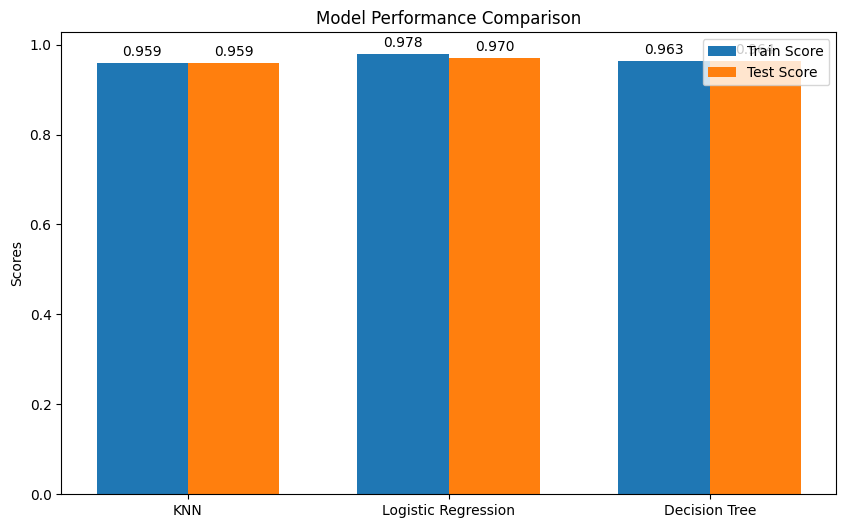

In [296]:
# Extracting train and test scores for each model
train_scores = [score[0][1] for score in scores]
test_scores = [score[1][1] for score in scores]
labels = ['KNN', 'Logistic Regression', 'Decision Tree']

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 6))

# Number of pairs
n_pairs = len(scores)

# Width of a bar
width = 0.35

# Setting up the indices for the pairs
indices = np.arange(n_pairs)

# Plotting training scores
train_bars = ax.bar(indices - width/2, train_scores, width, label='Train Score')

# Plotting testing scores
test_bars = ax.bar(indices + width/2, test_scores, width, label='Test Score')

# Adding labels and title
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(indices)
ax.set_xticklabels(labels)
ax.legend()

# Adding score labels on top of the bars
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_value_labels(train_bars)
add_value_labels(test_bars)

# Display the plot
plt.show()